In [1]:
import pandas as pd

In [2]:
police = pd.read_csv('https://raw.githubusercontent.com/justmarkham/pycon-2018-tutorial/master/police.csv')

In [4]:
police.shape

(91741, 15)

In [5]:
#What does each row represent
police.head(5)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [6]:
police.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

What does NaN mean?

Why might a value be missing?

Why mark it as NaN? Why not mark it as a 0 or an empty string or a string saying "Unknown"?

In [7]:
# what are these counts? how does this work?
police.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

# 1. . Remove the column that only contains missing values

In [8]:
# axis=1 also works, inplace is False by default, inplace=True avoids assignment statement
police.drop('county_name', axis='columns', inplace=True)

In [9]:
police.shape

(91741, 14)

In [10]:
police.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [11]:
police1 = police

In [12]:
# alternative method
#police1.dropna(axis='columns', how='all')

Lessons:

Pay attention to default arguments
Check your work
There is more than one way to do everything in pandas

# 2. Do men or women speed more often?

In [13]:
police[police.violation == 'Speeding']

#police[police['violation'] == 'Speeding']

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
6,2005-04-01,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91734,2015-12-31,20:20,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91735,2015-12-31,20:25,M,1992.0,23.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [14]:
police[police.violation == 'Speeding'].shape

(48463, 14)

In [15]:
police.driver_gender.value_counts()

M    62895
F    23511
Name: driver_gender, dtype: int64

### when someone is stopped for speeding, how often is it a man or woman?

In [16]:
police[police.violation == 'Speeding'].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [17]:
#want to see in terms of percentage
police[police.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [18]:
# alternative
police.loc[police.violation == 'Speeding', 'driver_gender'].value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

### when a man is pulled over, how often is it for speeding?

In [19]:
police[police.driver_gender == 'M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

### when a woman is pulled over, how often is it for speeding?

In [20]:
police[police.driver_gender == 'F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

### combines the two lines above

In [21]:
police.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

Is this analysis enough to arrive at a certain conclusion

What are some relevant facts that we don't know?

-- We don't know how many men and women are driving in Rhode Island.

-- We don't know how many miles they drove.

Lessons:

There is more than one way to understand a question

ALways answer the questions with the data you have. Your answers might change if you are given more data/information

# 3. Does gender affect who gets searched during a stop?

### ignore gender for the moment

In [22]:
police.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [23]:
police.search_conducted.value_counts(normalize = True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [24]:
# how does this work?Explain

police.search_conducted.mean()

0.03483720473942948

In [25]:
3196 / (88545 + 3196)

0.03483720473942948

In [26]:
# search rate by gender
police.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64


F - searched at 2% rate
M - searched at 4% rate

Does this prove that gender affects who gets searched?

We have no idea why they were searched

When people are pulled over for seatbelt violation they are rarely searched. When they are searched for license they are more likely searched. There could be a case women get pulled over generally for seat belt violation and men are searched for documents


In [27]:
# include a second factor
police.groupby(['violation', 'driver_gender']).search_conducted.mean()


violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

In [28]:
police.groupby([ 'driver_race','driver_gender','violation']).search_conducted.mean()

driver_race  driver_gender  violation          
Asian        F              Equipment              0.040000
                            Moving violation       0.017857
                            Other                  0.166667
                            Registration/plates    0.000000
                            Seat belt              0.000000
                            Speeding               0.005051
             M              Equipment              0.073864
                            Moving violation       0.046763
                            Other                  0.000000
                            Registration/plates    0.023256
                            Seat belt              0.102041
                            Speeding               0.011504
Black        F              Equipment              0.066937
                            Moving violation       0.041096
                            Other                  0.010526
                            Registration/plates    0


Males are getting searched at higher percentage at allmost everything



# 4. Why is search_type missing so often? 

In [29]:
police.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

### maybe search_type is missing any time search_conducted is False?

In [30]:
police.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

### test that theory, why is the Series empty?

In [31]:

police[police.search_conducted == False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

Ques - why is the above cell displays empty?

Ans - By default the Nulls or NAN's are droped in value_counts(). Meaning they are not counted as they are nulls.

### check the above 
### value_counts ignores missing values by default

In [32]:

police[police.search_conducted == False].search_type.value_counts(dropna = False)

NaN    88545
Name: search_type, dtype: int64

In [33]:

police[police.search_conducted == True].search_type.value_counts().sum()

3196

### when search_conducted is True, search_type is never missing

In [34]:
police[police.search_conducted == True].search_type.value_counts(dropna=True)

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonab

### Alternative

In [35]:

police[police.search_conducted == True].search_type.isnull().sum()

0

Lessons:

1. Verify your assumptions about your data
2. pandas functions ignore missing values by default

# 5. During a search, how often is the driver frisked?

In [36]:
police.search_type.unique()

array([nan, 'Incident to Arrest,Protective Frisk', 'Probable Cause',
       'Incident to Arrest', 'Probable Cause,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Probable Cause',
       'Incident to Arrest,Inventory',
       'Incident to Arrest,Probable Cause', 'Protective Frisk',
       'Reasonable Suspicion', 'Inventory', 'Inventory,Protective Frisk',
       'Incident to Arrest,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Protective Frisk',
       'Probable Cause,Protective Frisk',
       'Incident to Arrest,Inventory,Protective Frisk',
       'Protective Frisk,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Reasonable Suspicion',
       'Inventory,Probable Cause',
       'Incident to Arrest,Protective Frisk,Reasonable Suspicion',
       'Inventory,Probable Cause,Protective Frisk',
       'Inventory,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Reasonable Suspicion',
       'Inventory,Probable Cause,Reasonable Suspicion',

In [37]:
police.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonable Suspicion                         11
Incident to Arrest,Invent

In [38]:
## multiple types are separated by commas
police.search_type.value_counts(dropna = False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Inventory,Protective Frisk                                     11
Protective

In [39]:
# use bracket notation when creating a column
police['frisk'] = (police['search_type'] == 'Protective Frisk')

In [40]:
police['frisk']

0        False
1        False
2        False
3        False
4        False
         ...  
91736    False
91737    False
91738    False
91739    False
91740    False
Name: frisk, Length: 91741, dtype: bool

In [41]:
police.frisk.sum()

161

In [42]:
#Filtering oon frisk == True
police[police.frisk == True]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
339,2005-10-12,20:30,M,1987.0,18.0,Hispanic,Other Traffic Violation,Moving violation,True,Protective Frisk,Arrest Driver,True,0-15 Min,False,True
340,2005-10-12,20:30,M,1987.0,18.0,Hispanic,Other Traffic Violation,Moving violation,True,Protective Frisk,Arrest Driver,True,0-15 Min,False,True
415,2005-10-17,09:30,M,1983.0,22.0,Black,Speeding,Speeding,True,Protective Frisk,Citation,False,0-15 Min,False,True
600,2005-10-23,16:20,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Protective Frisk,Citation,False,16-30 Min,False,True
1115,2005-11-08,01:30,M,1979.0,26.0,White,Speeding,Speeding,True,Protective Frisk,Arrest Driver,True,16-30 Min,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87397,2015-07-14,10:59,M,1993.0,22.0,White,Equipment/Inspection Violation,Equipment,True,Protective Frisk,Warning,False,16-30 Min,False,True
87770,2015-07-29,18:27,M,1978.0,37.0,White,Speeding,Speeding,True,Protective Frisk,Citation,False,30+ Min,False,True
89017,2015-09-08,10:43,M,1988.0,27.0,Hispanic,Seatbelt Violation,Seat belt,True,Protective Frisk,Citation,False,16-30 Min,False,True
89656,2015-09-30,17:18,M,1966.0,49.0,White,Speeding,Speeding,True,Protective Frisk,Warning,False,16-30 Min,False,True


In [43]:
# is this the correct answer
police.frisk.mean()

0.0017549405391264537

In [44]:
#use value_counts to extract value and check how  0.0017549405391264537 value was obtained 
police.frisk.value_counts()

False    91580
True       161
Name: frisk, dtype: int64

In [45]:
# uses the wrong denominator (includes stops that didn't involve a search)
161 / (91580 + 161)

0.0017549405391264537

In [46]:
# includes partial matches
police['frisk'] = police.search_type.str.contains('Protective Frisk')

In [47]:
police['frisk']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
91736    NaN
91737    NaN
91738    NaN
91739    NaN
91740    NaN
Name: frisk, Length: 91741, dtype: object

In [48]:
police['frisk'].value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [49]:
police.frisk.sum()

274

In [50]:
# frisk rate during a search

#mean method is smart enough to discard the NaN
police.frisk.mean()

0.08573216520650813

In [51]:
# str.contains preserved missing values from search_type

#pandas strings vs python strings
police.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [52]:
# excludes stops that didn't involve a search
274 / (2922 + 274)

0.08573216520650813

Lessons:

1. Use string methods to find partial matches
2. Use the correct denominator when calculating rates
3. pandas calculations ignore missing values
4. Apply the "smell test" to your results

# 6. Which year had the least number of stops?

In [53]:
police.stop_date.head(10)

0    2005-01-02
1    2005-01-18
2    2005-01-23
3    2005-02-20
4    2005-03-14
5    2005-03-23
6    2005-04-01
7    2005-06-06
8    2005-07-13
9    2005-07-13
Name: stop_date, dtype: object

In [54]:
police.stop_date.value_counts()

2012-01-11    69
2012-02-28    65
2007-05-16    62
2012-01-02    61
2007-01-10    60
              ..
2005-07-28     1
2005-12-25     1
2005-09-29     1
2010-12-25     1
2005-08-07     1
Name: stop_date, Length: 3768, dtype: int64

In [55]:
# this works, but there's a better way
police.stop_date.str.slice(0, 4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [56]:
# make sure you create this column
# cat short for concatenate
combined = police.stop_date.str.cat(police.stop_time, sep=' ')

In [57]:
combined.head(5)

0    2005-01-02 01:55
1    2005-01-18 08:15
2    2005-01-23 23:15
3    2005-02-20 17:15
4    2005-03-14 10:00
Name: stop_date, dtype: object

In [58]:
police['stop_datetime'] = pd.to_datetime(combined)

In [59]:
police['stop_datetime'].head(5)

0   2005-01-02 01:55:00
1   2005-01-18 08:15:00
2   2005-01-23 23:15:00
3   2005-02-20 17:15:00
4   2005-03-14 10:00:00
Name: stop_datetime, dtype: datetime64[ns]

In [60]:
police.stop_datetime.dtypes

dtype('<M8[ns]')

In [61]:
police.stop_datetime.dt

In [62]:
police.stop_datetime.dt.year.head(5)

0    2005
1    2005
2    2005
3    2005
4    2005
Name: stop_datetime, dtype: int64

In [63]:
police.stop_datetime.dt.weekday.head(5)

0    6
1    1
2    6
3    6
4    0
Name: stop_datetime, dtype: int64

In [64]:
police.stop_datetime.dt.month.value_counts()

1     8479
5     7935
11    7877
10    7745
3     7742
6     7630
8     7615
7     7568
4     7529
9     7427
12    7152
2     7042
Name: stop_datetime, dtype: int64

In [ ]:

police.stop_datetime.dt.year.value_counts()

In [64]:

police.stop_datetime.dt.year.value_counts().sort_values().index[0]

2005

Lessons:


1. Use the datetime data type for dates and times

# 7. How does drug activity change by time of day?

In [65]:
police.drugs_related_stop.value_counts(dropna = False)

False    90926
True       815
Name: drugs_related_stop, dtype: int64

In [66]:
# baseline rate
police.drugs_related_stop.mean()

0.008883705213590434

In [67]:
# can't groupby 'hour' unless you create it as a column
police.groupby(police.stop_datetime.dt.hour).drugs_related_stop.mean().head(5)

stop_datetime
0    0.019728
1    0.013507
2    0.015462
3    0.017065
4    0.011811
Name: drugs_related_stop, dtype: float64

In [68]:
#%matplotlib inline
# line plot by default (for a Series)
police.groupby(police.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

Lessons:

1. Use plots to help you understand trends
2. Create exploratory plots using pandas one-liners

# 8. Do most stops occur at night?

In [69]:
police.stop_datetime.dt.hour.value_counts().head(5)

10    7350
9     6838
11    5877
14    5634
23    5629
Name: stop_datetime, dtype: int64

In [70]:
police.stop_datetime.dt.hour.value_counts().sort_values().head(5)

5      210
4      254
3     1172
21    1499
18    2168
Name: stop_datetime, dtype: int64

In [71]:
police.stop_datetime.dt.hour.value_counts().sort_index().head(5)

0    5221
1    4442
2    2975
3    1172
4     254
Name: stop_datetime, dtype: int64

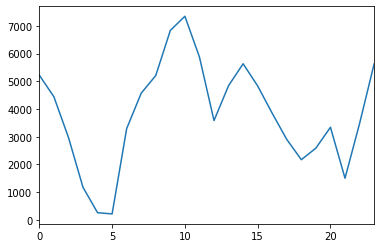

In [72]:
police.stop_datetime.dt.hour.value_counts().sort_index().plot()

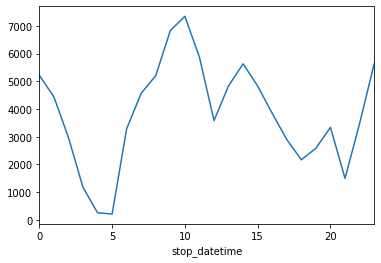

In [73]:
# alternative method
police.groupby(police.stop_datetime.dt.hour).stop_date.count().plot()

Lessons:

Be conscious of sorting when plotting

# 9. Find the bad data in the stop_duration column and fix it 

In [74]:
# mark bad data as missing
police.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [75]:
police.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [79]:
#whats wrong with this code?
police[police.stop_duration == 1 | police.stop_duration == 2].stop_duration = 'NaN'

TypeError: cannot compare a dtyped [object] array with a scalar of type [bool]

In [80]:

police[(police.stop_duration == 1) | (police.stop_duration == 2)].stop_duration = 'NaN'

In [81]:
police.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [82]:
police[(police.stop_duration == '1') | (police.stop_duration == '2')].stop_duration = 'NaN'

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [83]:
police.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [84]:
police.loc[(police.stop_duration == '1') | (police.stop_duration == '2'), 'stop_duration'] = 'NaN'

In [85]:
police.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [86]:
import numpy as np

In [87]:
police.loc[police.stop_duration == 'NaN','stop_duration'] = np.nan

In [88]:
police.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [89]:
# alternative method


#police.stop_duration.replace(['1', '2'], value=np.nan, inplace=True)

In [90]:
police.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

Lessons:

1. Ambiguous data should be marked as missing
2. Don't ignore the SettingWithCopyWarning
3. NaN is not a string

# 10. What is the mean stop_duration for each violation_law?

In [91]:
# make sure you create this column. Why?
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

police['stop_minutes'] = police.stop_duration.map(mapping)

In [92]:
police['stop_minutes'].head(5)

0     8.0
1     8.0
2     8.0
3    23.0
4     8.0
Name: stop_minutes, dtype: float64

In [93]:
# matches value_counts for stop_duration
police.stop_minutes.value_counts()

8.0     69543
23.0    13635
45.0     3228
Name: stop_minutes, dtype: int64

In [94]:
police.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.900265
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577690
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_minutes, dtype: float64

In [95]:
police.groupby('violation_raw').stop_minutes.agg(['mean', 'count'])

,mean,count
violation_raw,,
APB,20.987342,79
Call for Service,22.034669,1298
Equipment/Inspection Violation,11.460345,11020
Motorist Assist/Courtesy,16.916256,203
Other Traffic Violation,13.900265,16223
Registration Violation,13.745629,3432
Seatbelt Violation,9.741531,2952
Special Detail/Directed Patrol,15.061100,2455
Speeding,10.577690,48462


Lessons:

1. Convert strings to numbers for analysis
2. Approximate when necessary
3. Use count with mean to looking for meaningless means

# 11. Plot the results of the first groupby from the previous exercise

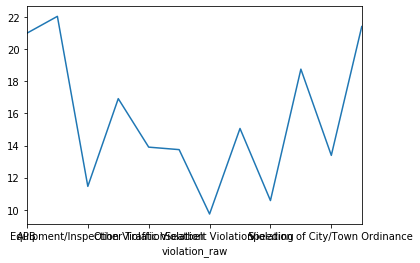

In [96]:
police.groupby('violation_raw').stop_minutes.mean().plot()

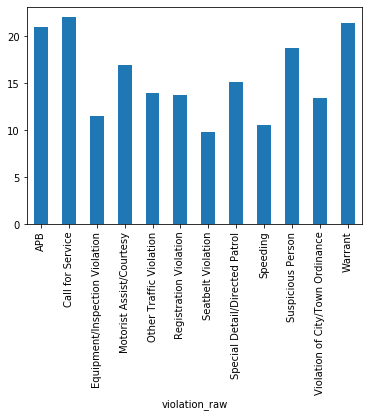

In [97]:
# how could this be made better?
police.groupby('violation_raw').stop_minutes.mean().plot(kind='bar')

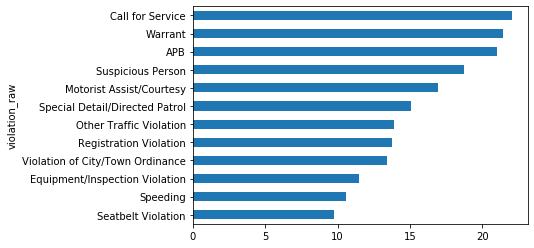

In [98]:
police.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind='barh')

Lessons:

1. Don't use a line plot to compare categories
2. Be conscious of sorting and orientation when plotting

# 12. Compare the age distributions for each violation

In [99]:
# good first step
police.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11007.0,31.781503,11.400900,16.0,23.0,28.0,38.0,89.0
Moving violation,16164.0,36.120020,13.185805,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.536870,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48361.0,33.530097,12.821847,15.0,23.0,30.0,42.0,90.0


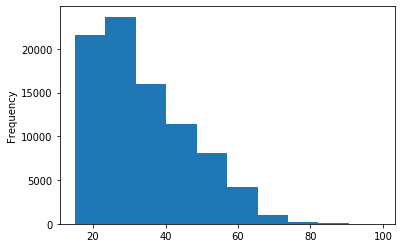

In [100]:
# histograms are excellent for displaying distributions
police.driver_age.plot(kind='hist')

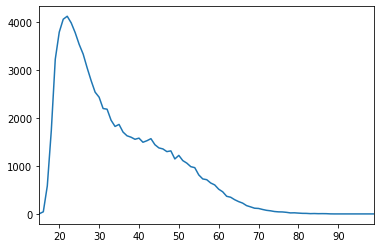

In [101]:
# similar to a histogram
police.driver_age.value_counts().sort_index().plot()